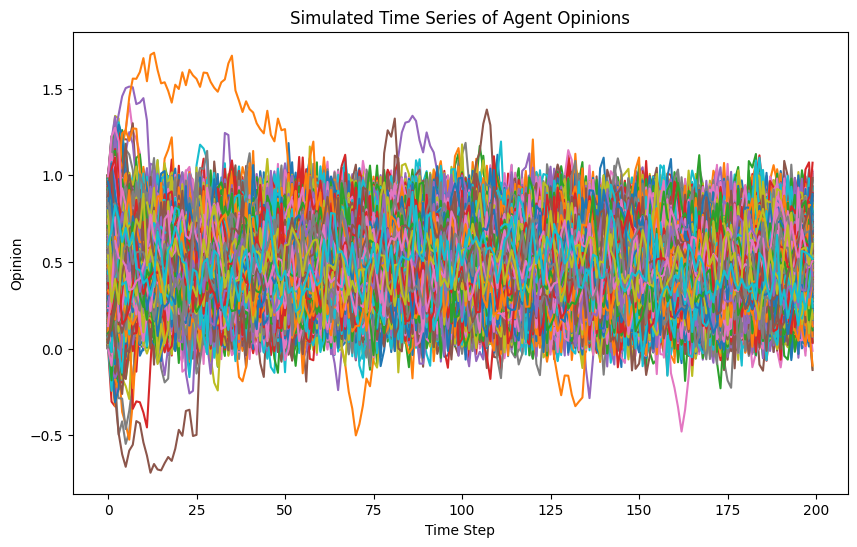

Parameter: 0.1000 | Log-Likelihood: 857195.9542
Parameter: 0.1091 | Log-Likelihood: 888965.5205
Parameter: 0.1182 | Log-Likelihood: 924886.7457
Parameter: 0.1273 | Log-Likelihood: 964306.4290
Parameter: 0.1364 | Log-Likelihood: 1007313.8334
Parameter: 0.1455 | Log-Likelihood: 1053483.2697
Parameter: 0.1545 | Log-Likelihood: 1102176.7099
Parameter: 0.1636 | Log-Likelihood: 1154142.2092
Parameter: 0.1727 | Log-Likelihood: 1207606.6906
Parameter: 0.1818 | Log-Likelihood: 1262596.0399
Parameter: 0.1909 | Log-Likelihood: 1318356.0440
Parameter: 0.2000 | Log-Likelihood: 1375107.1425
Parameter: 0.2091 | Log-Likelihood: 1431656.8433
Parameter: 0.2182 | Log-Likelihood: 1487939.4523
Parameter: 0.2273 | Log-Likelihood: 1542914.2250
Parameter: 0.2364 | Log-Likelihood: 1597368.5661
Parameter: 0.2455 | Log-Likelihood: 1649885.5500
Parameter: 0.2545 | Log-Likelihood: 1700598.3500
Parameter: 0.2636 | Log-Likelihood: 1748811.3435
Parameter: 0.2727 | Log-Likelihood: 1795044.2609
Parameter: 0.2818 | Log-

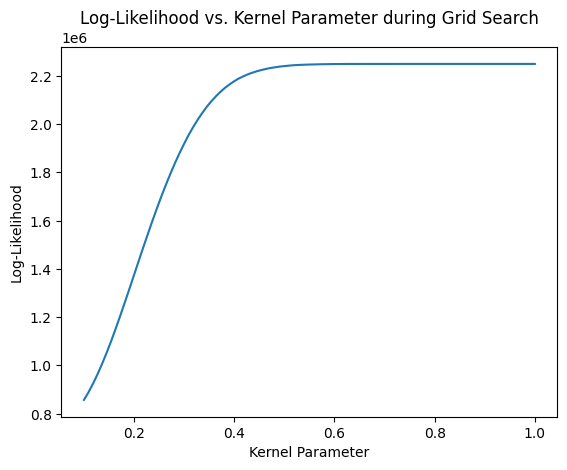

Peak Log-Likelihood occurs at parameter: 0.7273
True parameter: 0.7
Inferred parameter: 0.7272727272727272
Maximum log-likelihood: 2249313.5452006944


In [16]:
import numpy as np
import matplotlib.pyplot as plt

class OpinionDynamics:
    def __init__(self, n_agents, n_steps, true_param, lambda_true, noise_sigma):
        self.n_agents = n_agents
        self.n_steps = n_steps
        self.true_param = true_param  # True kernel parameter
        self.lambda_true = lambda_true  # True lambda for the model
        self.noise_sigma = noise_sigma
        self.X = np.random.rand(n_agents)  # Initial opinions
        self.opinion_history = []

    def simulate(self):
        """ Simulate agent opinion dynamics over time. """
        self.opinion_history = []
        for t in range(self.n_steps):
            self.opinion_history.append(self.X.copy())
            for i in range(self.n_agents):
                # Pick a random agent j from neighbors (for simplicity, we choose randomly)
                j = np.random.randint(0, self.n_agents)
                kernel_value = self.kernel(self.X[i], self.X[j], self.true_param)  # Use true_param here
                delta_i = np.random.normal(loc=self.lambda_true * kernel_value * (self.X[j] - self.X[i]),
                                           scale=self.noise_sigma)
                self.X[i] += delta_i

    def kernel(self, X_i, X_j, param):
        """ Non-smooth step-function kernel. """
        return 1 if abs(X_j - X_i) < param else 0

    def log_likelihood(self, param):
        """ Log-likelihood calculation for the kernel parameter. """
        log_likelihood = 0
        for t in range(1, len(self.opinion_history)):
            for i in range(self.n_agents):
                X_t = self.opinion_history[t][i]
                X_t_1 = self.opinion_history[t-1][i]
                kernel_value = self.kernel(X_t_1, X_t, param)  # Use param here

                # The update should follow a Gaussian distribution as defined in the model
                predicted_delta = self.lambda_true * kernel_value * (X_t - X_t_1)

                # Log-likelihood computation based on Gaussian distribution
                log_likelihood += -0.5 * np.log(2 * np.pi * self.noise_sigma ** 2) - 0.5 * ((X_t - X_t_1 - predicted_delta) ** 2) / self.noise_sigma ** 2

        return log_likelihood

    def grid_search(self, param_range):
        """ Grid search to find the best kernel parameter. """
        best_param = None
        best_log_likelihood = -float('inf')  # Start with a very low log-likelihood (maximization)
        log_likelihoods = []  # To store log-likelihood values for plotting

        # Perform grid search over the range of parameters
        for param in param_range:
            log_likelihood_value = self.log_likelihood(param)
            log_likelihoods.append(log_likelihood_value)
            print(f"Parameter: {param:.4f} | Log-Likelihood: {log_likelihood_value:.4f}")  # Print the log-likelihood for each parameter
            if log_likelihood_value > best_log_likelihood:
                best_log_likelihood = log_likelihood_value
                best_param = param

        # Plot the log-likelihood over the parameter range
        plt.plot(param_range, log_likelihoods, label='Log-Likelihood vs. Parameter')
        plt.xlabel('Kernel Parameter')
        plt.ylabel('Log-Likelihood')
        plt.title('Log-Likelihood vs. Kernel Parameter during Grid Search')
        plt.show()

        # Print out the best parameter and its corresponding log-likelihood
        print(f"Peak Log-Likelihood occurs at parameter: {best_param:.4f}")
        return best_param, best_log_likelihood  # Return inferred parameter and maximum log-likelihood value

    def plot_time_series(self):
        """ Plot the simulated time series of agent opinions. """
        plt.figure(figsize=(10, 6))
        for i in range(self.n_agents):
            plt.plot(range(self.n_steps), np.array(self.opinion_history)[:, i], label=f'Agent {i+1}')

        plt.xlabel('Time Step')
        plt.ylabel('Opinion')
        plt.title('Simulated Time Series of Agent Opinions')
        plt.show()


# Simulate the system with true parameters
true_param = 0.7  # True kernel parameter for simulation
lambda_true = 0.5  # True lambda for the model (susceptibility to influence)
n_agents = 10**4  # Number of agents
n_steps = 200  # Number of time steps
noise_sigma = 0.1  # Noise standard deviation
model = OpinionDynamics(n_agents, n_steps, true_param, lambda_true, noise_sigma)

# Simulate agent opinions
model.simulate()

# Plot the simulated time series of opinions
model.plot_time_series()

# Perform grid search to infer the kernel parameter (param)
param_range = np.linspace(0.1, 1.0, 100)  # Search range for param
inferred_param, final_log_likelihood = model.grid_search(param_range)

# Print the inferred parameter and the log-likelihood value
print(f"True parameter: {true_param}")
print(f"Inferred parameter: {inferred_param}")
print(f"Maximum log-likelihood: {final_log_likelihood}")
